## Calculation of RMSE and Pearson Correlation

In this script, the Root Mean Square Error (RMSE) and Pearson Correlation are being calculated using datasets that serve as the foundation for the study. These datasets also include feedback and ratings provided by both ChatGPT and Bing (Bing was only used with the Mohler dataset).

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from an Excel file
Mohler_df = pd.read_excel('Mohler_dataset.xlsx', engine='openpyxl')
WU_df = pd.read_excel('WU_dataset.xlsx', engine='openpyxl')

#### Mohler dataset

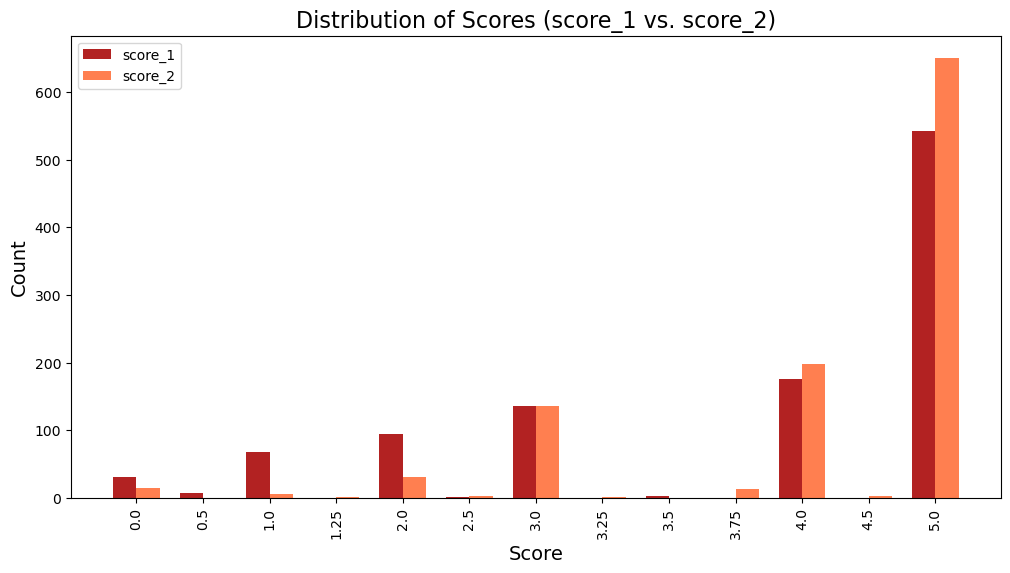

In [3]:
# Count occurrences of each score in "score_1" and "score_2" columns
score_1_counts = Mohler_df["score_1"].value_counts().reset_index()
score_2_counts = Mohler_df["score_2"].value_counts().reset_index()

# Rename columns
score_1_counts.columns = ["Score", "Count_score_1"]
score_2_counts.columns = ["Score", "Count_score_2"]

# Merge the counts dataframes on the "Score" column
combined_counts = score_1_counts.merge(score_2_counts, on="Score", how="outer").fillna(0)

# Sort the combined_counts DataFrame by the "Score" column
combined_counts = combined_counts.sort_values(by="Score")

# Set a beautiful color palette
sns.set_palette("pastel")

# Define the width of each bar
bar_width = 0.35

# Create the bar plot with clustered bars
fig, ax = plt.subplots(figsize=(12, 6))

# Create x values for the bars
x = range(len(combined_counts))

# Plot score_1 bars
ax.bar(x, combined_counts["Count_score_1"], width=bar_width, color='firebrick', label='score_1')

# Plot score_2 bars next to score_1 bars
ax.bar([i + bar_width for i in x], combined_counts["Count_score_2"], width=bar_width, color='coral', label='score_2')

# Set x-axis labels and tick positions
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(combined_counts["Score"])

plt.xlabel("Score", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Scores (score_1 vs. score_2)", fontsize=16)
plt.legend()
plt.xticks(rotation=90)
plt.show()


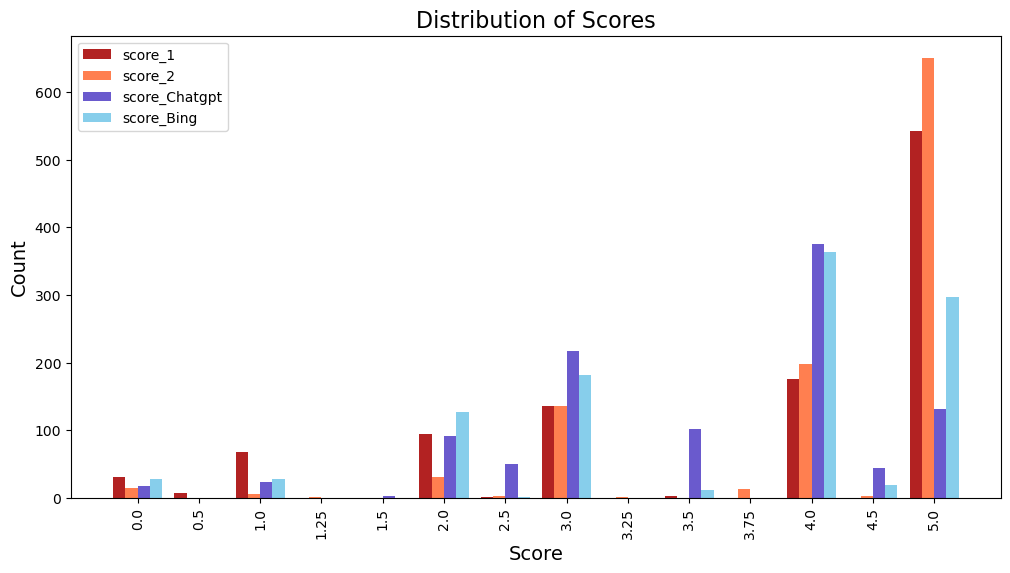

In [4]:
# Count occurrences of each score in "score_1", "score_2", "score_Chatgpt", and "score_Bing" columns
score_1_counts = Mohler_df["score_1"].value_counts().reset_index()
score_2_counts = Mohler_df["score_2"].value_counts().reset_index()
score_Chatgpt_counts = Mohler_df["score_Chatgpt"].value_counts().reset_index()
score_Bing_counts = Mohler_df["score_Bing"].value_counts().reset_index()

# Rename columns
score_1_counts.columns = ["Score", "Count_score_1"]
score_2_counts.columns = ["Score", "Count_score_2"]
score_Chatgpt_counts.columns = ["Score", "Count_score_Chatgpt"]
score_Bing_counts.columns = ["Score", "Count_score_Bing"]

# Merge the counts dataframes on the "Score" column
combined_counts = score_1_counts.merge(score_2_counts, on="Score", how="outer").fillna(0)
combined_counts = combined_counts.merge(score_Chatgpt_counts, on="Score", how="outer").fillna(0)
combined_counts = combined_counts.merge(score_Bing_counts, on="Score", how="outer").fillna(0)

# Sort the combined_counts DataFrame by the "Score" column
combined_counts = combined_counts.sort_values(by="Score")

# Define the width of each bar
bar_width = 0.2

# Create the bar plot with clustered bars
fig, ax = plt.subplots(figsize=(12, 6))

# X-axis positions for the bars
x = range(len(combined_counts))

# Plot score_1 bars
ax.bar(x, combined_counts["Count_score_1"], width=bar_width, color='firebrick', label='score_1')

# Plot score_2 bars next to score_1 bars
ax.bar([i + bar_width for i in x], combined_counts["Count_score_2"], width=bar_width, color='coral', label='score_2')

# Plot score_Chatgpt bars next to score_2 bars
ax.bar([i + 2*bar_width for i in x], combined_counts["Count_score_Chatgpt"], width=bar_width, color='slateblue', label='score_Chatgpt')

# Plot score_Bing bars next to score_Chatgpt bars
ax.bar([i + 3*bar_width for i in x], combined_counts["Count_score_Bing"], width=bar_width, color='skyblue', label='score_Bing')

# Set x-axis labels and tick positions
ax.set_xticks([i + 1.5*bar_width for i in x])
ax.set_xticklabels(combined_counts["Score"])

plt.xlabel("Score", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Scores", fontsize=16)
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [5]:
# Create a function to calculate RMSE and Pearson correlation
def calculate_metrics(data, col1, col2):
    mse = mean_squared_error(data[col1], data[col2])
    rmse = np.sqrt(mse)
    pearson_corr, _ = pearsonr(data[col1], data[col2])
    return rmse, pearson_corr

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['id', 'RMSE_Chatgpt_score_avg', 'RMSE_Bing_score_avg', 'RMSE_score_1_score_2', 'RMSE_Chatgpt_Bing', 'Pearson_Chatgpt_score_avg', 'Pearson_Bing_score_avg', 'Pearson_score_1_score_2', 'Pearson_Chatgpt_Bing'])

# Calculate RMSE and Pearson correlation for each unique ID
unique_ids = Mohler_df['id'].unique()

for id in unique_ids:
    id_data = Mohler_df[Mohler_df['id'] == id]
    
    rmse_Chatgpt_score_avg, pearson_Chatgpt_score_avg = calculate_metrics(id_data, 'score_Chatgpt', 'score_avg')
    rmse_Bing_score_avg, pearson_Bing_score_avg = calculate_metrics(id_data, 'score_Bing', 'score_avg')
    rmse_score_1_score_2, pearson_score_1_score_2 = calculate_metrics(id_data, 'score_1', 'score_2')
    rmse_Chatgpt_Bing, pearson_Chatgpt_Bing = calculate_metrics(id_data, 'score_Chatgpt', 'score_Bing')
    
    results_df = results_df.append({
        'id': id,
        'RMSE_Chatgpt_score_avg': rmse_Chatgpt_score_avg,
        'RMSE_Bing_score_avg': rmse_Bing_score_avg,
        'RMSE_score_1_score_2': rmse_score_1_score_2,
        'RMSE_Chatgpt_Bing': rmse_Chatgpt_Bing,
        'Pearson_Chatgpt_score_avg': pearson_Chatgpt_score_avg,
        'Pearson_Bing_score_avg': pearson_Bing_score_avg,
        'Pearson_score_1_score_2': pearson_score_1_score_2,
        'Pearson_Chatgpt_Bing': pearson_Chatgpt_Bing
    }, ignore_index=True)


C:\Users\ninab\AppData\Local\Temp\ipykernel_7560\2702329882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\ninab\AppData\Local\Temp\ipykernel_7560\2702329882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\ninab\AppData\Local\Temp\ipykernel_7560\2702329882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\ninab\AppData\Local\Temp\ipykernel_7560\2702329882.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\ninab\AppData\Local\Temp\ipykernel_7560\2702329882.

In [6]:
# Save the results to a CSV file
results_df.to_csv('RMSE_Pearson_Mohler_dataset.csv', index=False)

#### WU dataset

Distribution of Points:

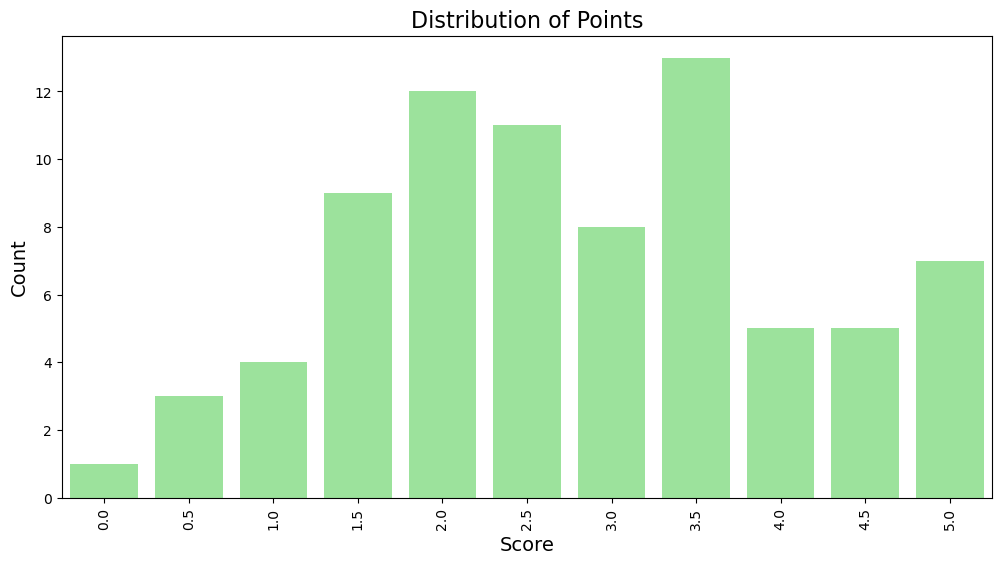

In [7]:
# Convert relevant columns to numeric (assuming "Points" column contains scores)
WU_df["Points"] = pd.to_numeric(WU_df["Points"], errors='coerce')

# Count occurrences of each score in "Points" column
score_counts = WU_df["Points"].value_counts().reset_index()
score_counts.columns = ["Score", "Count"]

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Score", y="Count", data=score_counts, color='lightgreen')
plt.xlabel("Score", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Points", fontsize=16)
plt.xticks(rotation=90)
plt.show()

Visualization of Distribution of Points including ChatGPT and Bing:

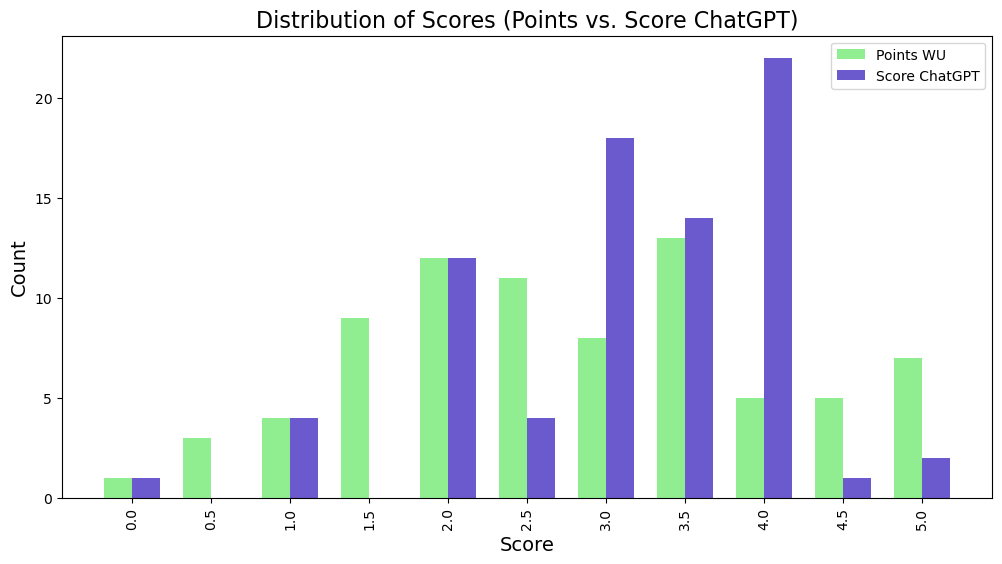

In [8]:
# Count occurrences of each score in "Points" and "score_Chatgpt" columns
Points_counts = WU_df["Points"].value_counts().reset_index()
Score_Chatgpt_counts = WU_df["score_Chatgpt"].value_counts().reset_index()

# Rename columns
Points_counts.columns = ["Score", "Count_Points"]
Score_Chatgpt_counts.columns = ["Score", "Count_score_Chatgpt"]

# Merge the counts dataframes on the "Score" column
combined_counts = Points_counts.merge(Score_Chatgpt_counts, on="Score", how="outer").fillna(0)

# Sort the combined_counts DataFrame by the "Score" column
combined_counts = combined_counts.sort_values(by="Score")


# Define the width of each bar
bar_width = 0.35

# Create the bar plot with clustered bars
fig, ax = plt.subplots(figsize=(12, 6))

# Create x values for the bars
x = range(len(combined_counts))

# Plot Points bars
ax.bar(x, combined_counts["Count_Points"], width=bar_width, color='lightgreen', label='Points WU')

# Plot ChatGPT bars next to Points bars
ax.bar([i + bar_width for i in x], combined_counts["Count_score_Chatgpt"], width=bar_width, color='slateblue', label='Score ChatGPT')

# Set x-axis labels and tick positions
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(combined_counts["Score"])

plt.xlabel("Score", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Scores (Points vs. Score ChatGPT)", fontsize=16)
plt.legend()
plt.xticks(rotation=90)
plt.show()

Calculation of RMSE and Pearson Correlation:

In [9]:
# Create a function to calculate RMSE and Pearson correlation for a given combination
def calculate_WUmetrics(data):
    mse = mean_squared_error(data['score_Chatgpt'], data['Points'])
    rmse = np.sqrt(mse)
    pearson_corr, _ = pearsonr(data['score_Chatgpt'], data['Points'])
    return rmse, pearson_corr

# Calculate RMSE and Pearson correlation for each unique Submission ID (question)
unique_questions = WU_df['Submission ID'].unique()

results_WU_df = pd.DataFrame(columns=['Submission ID', 'RMSE_Chatgpt_score', 'Pearson_Correlation'])

for question in unique_questions:
    question_data = WU_df[WU_df['Submission ID'] == question]
    
    rmse_Chatgpt_score, pearson_corr = calculate_WUmetrics(question_data)
    
    results_WU_df = results_WU_df.append({
        'Submission ID': question,
        'RMSE_Chatgpt_score': rmse_Chatgpt_score,
        'Pearson_Correlation': pearson_corr
    }, ignore_index=True)

C:\Users\ninab\AppData\Local\Temp\ipykernel_7560\356977453.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_WU_df = results_WU_df.append({
C:\Users\ninab\AppData\Local\Temp\ipykernel_7560\356977453.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_WU_df = results_WU_df.append({
C:\Users\ninab\AppData\Local\Temp\ipykernel_7560\356977453.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_WU_df = results_WU_df.append({
C:\Users\ninab\AppData\Local\Temp\ipykernel_7560\356977453.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_WU_df = results_WU_df.append({
C:\Users\ninab\AppData\Local\Temp\ipyker

In [10]:
# Save results_df to a CSV file
results_WU_df.to_csv('RMSE_Pearson_WU_dataset.csv', index=False)